In [61]:
#Packages import
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import lightkurve as lk
import math
import astropy.units as u

In [62]:
# Search for your target using its TIC ID 
TIC = 'TIC 219435542' 

In [63]:
# Check the availability of the data for this target
available_data_all = lk.search_lightcurve(TIC, author='SPOC');

In [64]:
available_data_all

SearchResult containing 9 data products.

 #     mission     year author exptime target_name distance
                                  s                 arcsec 
--- -------------- ---- ------ ------- ----------- --------
  0 TESS Sector 14 2019   SPOC     120   219435542      0.0
  1 TESS Sector 15 2019   SPOC     120   219435542      0.0
  2 TESS Sector 21 2020   SPOC     120   219435542      0.0
  3 TESS Sector 22 2020   SPOC     120   219435542      0.0
  4 TESS Sector 40 2021   SPOC     120   219435542      0.0
  5 TESS Sector 41 2021   SPOC     120   219435542      0.0
  6 TESS Sector 47 2021   SPOC     120   219435542      0.0
  7 TESS Sector 48 2022   SPOC     120   219435542      0.0
  8 TESS Sector 60 2022   SPOC     120   219435542      0.0

C:\Users\Nick Landing\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\lightkurve\search.py:414: LightkurveWarning: Warning: 6 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  warnings.warn(
C:\Users\Nick Landing\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\lightkurve\search.py:414: LightkurveWarning: Warning: 6 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  warnings.warn(
C:\Users\Nick Landing\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\lightkurve\search.py:414: LightkurveWarnin

<IPython.core.display.Javascript object>


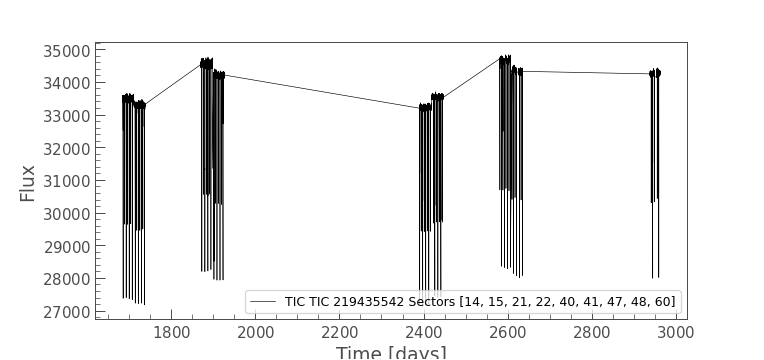

In [68]:
# Define list of sectors to download
sectors = [14,15,21,22,40,41,47,48,60]

# Download and concatenate light curves for each sector
lc_all = []
for sector in sectors:
    # Download light curve
    lc = lk.search_lightcurve(TIC, sector=sector).download().remove_nans();
    
    # Append to list
    lc_all.append(lc)

# Concatenate light curves
lc_all = lc_all[0].append(lc_all[1:])

# Plot light curves
lc_all.plot(label='TIC '+str(TIC)+' Sectors '+str(sectors), c='k', lw=0.5)

# Add legend and axis labels
plt.legend()
plt.xlabel('Time [days]')
plt.ylabel('Flux')

# Show plot
plt.show()

<IPython.core.display.Javascript object>


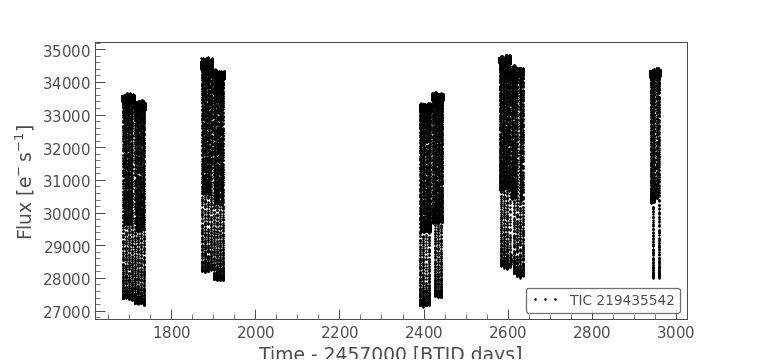

In [69]:
lc_all.plot(color = 'black', lw = 0, marker = '.');

<IPython.core.display.Javascript object>


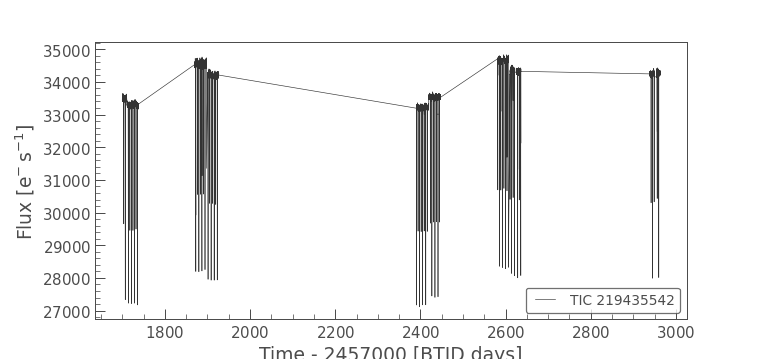

<IPython.core.display.Javascript object>


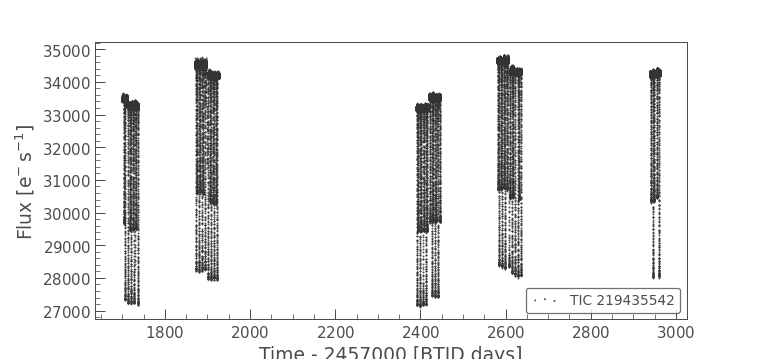

In [70]:
mask = ((lc_all.time.value < 3000)&(lc_all.time.value > 1700))
masked_lc=lc_all[mask];
masked_lc.plot();
masked_lc.scatter(s=1);

`period` contains 786431 points.Periodogram is likely to be large, and slow to evaluate. Consider setting `frequency_factor` to a higher value.


<IPython.core.display.Javascript object>


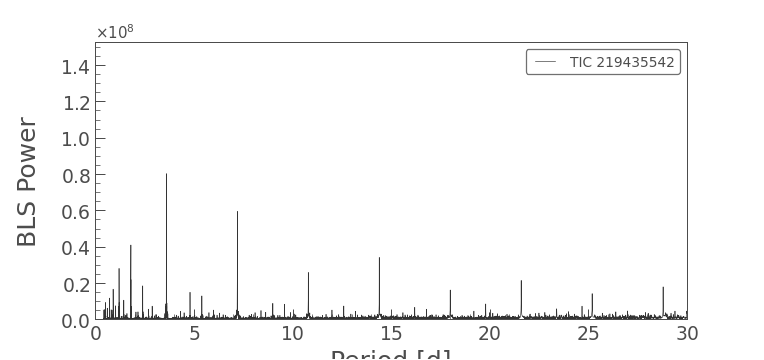

Period at 1th max power = 3.599495994959950096 d
BLS max power = 80199875.286181
Epoch max power = 2458703.450372
----------------------------------------
Period at 2th max power = 3.599199991999920023 d
BLS max power = 65301587.113587
Epoch max power = 2458703.500372
----------------------------------------
Period at 3th max power = 3.599791997919978837 d
BLS max power = 64750050.643823
Epoch max power = 2458703.395372
----------------------------------------
Period at 4th max power = 7.198891988919888796 d
BLS max power = 59443627.342043
Epoch max power = 2458707.055372
----------------------------------------
Period at 5th max power = 7.199187991879919757 d
BLS max power = 58384582.499731
Epoch max power = 2458707.035372
----------------------------------------
Period at 6th max power = 7.198595985959860499 d
BLS max power = 54476973.917327
Epoch max power = 2458707.080372
----------------------------------------
Period at 7th max power = 7.199483994839948053 d
BLS max power = 51758

In [71]:
import numpy as np
import matplotlib.pyplot as plt

# Assume masked_lc is the light curve object with any NaNs removed.
period = np.linspace(0.4, 30, 100000)  # limit the period range to 0.4 to 30
bls = masked_lc.to_periodogram(method='bls', period=period, frequency_factor=100)

# Plot the periodogram
bls.plot()
plt.ylabel('BLS Power', fontsize=20, labelpad=15)
plt.xlabel('Period [d]', fontsize=20)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.xlim(0, 30)
plt.ylim([0, 152563096.435379])

# Find the periods and powers sorted by power
powers = bls.power
periods = bls.period
sorted_indices = np.argsort(powers)[::-1]
sorted_powers = powers[sorted_indices]
sorted_periods = periods[sorted_indices]
sorted_transits = sorted_transits = bls.transit_time.jd[sorted_indices]

# Print the periods and powers of the highest and second highest peaks
# Reasoning behind 9 is that is the most confirmed and unconfirmed planets of a solar system (the Sun's solar system)
for i in range(9):
    # check if the current power has a different mantissa than the previous one
    if i > 0 and np.floor(np.log10(sorted_powers[i])) != np.floor(np.log10(sorted_powers[i-1])):
        print('----------------------------------------')
    print(f'Period at {i+1}th max power = {sorted_periods[i]:.18f}')
    print(f'BLS max power = {sorted_powers[i]:f}')
    print(f'Epoch max power = {sorted_transits[i]:f}')
    print('----------------------------------------')


C:\Users\Nick Landing\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\lightkurve\lightcurve.py:1040: LightkurveWarning: `epoch_time` appears to be given in JD, however the light curve time uses BTJD (i.e. JD - 2457000).
  warnings.warn(


<IPython.core.display.Javascript object>


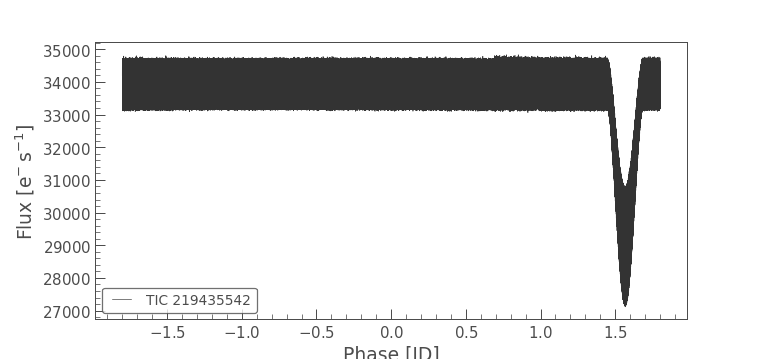

<IPython.core.display.Javascript object>


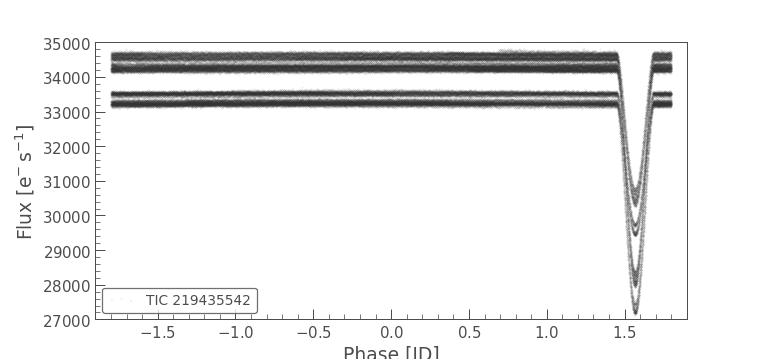

(27000.0, 35000.0)

In [75]:
#Here we will fold the lightcurve based on the period and the epoch time we found earlier.
#After folding your light curve you should see a signal (transit) on phase 0.
periodvalue= 3.599495994959950096
epochtime = 2458703.450372
folded_lc = masked_lc.fold(periodvalue, epoch_time=epochtime)
folded_lc.plot();
folded_lc.scatter(s=0.01)
#Limits on x and y axis are given manually. You may need to change them.
plt.xlim(-1.9,1.9)
plt.ylim([27000,35000])

C:\Users\Nick Landing\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\lightkurve\lightcurve.py:1040: LightkurveWarning: `epoch_time` appears to be given in JD, however the light curve time uses BTJD (i.e. JD - 2457000).
  warnings.warn(


<IPython.core.display.Javascript object>


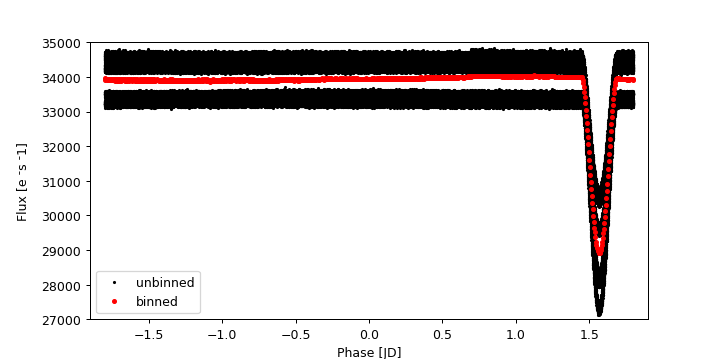

(27000.0, 35000.0)

In [77]:
period  = periodvalue
t0 = epochtime 

folded2_lc = masked_lc.fold(periodvalue, epoch_time=epochtime)

#Bin the folded lightcurve. Here we bin at 30 minutes.
folded2_lc_binned = folded_lc.bin(5/24/60)

fig, ax = plt.subplots(figsize = (8,4))

folded2_lc.plot(ax = ax, marker = '.', linewidth = 0, color = 'black', alpha = 1, markersize = 3)
folded2_lc_binned.plot(ax = ax, marker = 'o', linewidth = 0, color = 'red', alpha = 1, markersize = 3)
plt.legend(labels= ['unbinned', 'binned'], fontsize=10)
plt.ylabel('Flux [e ־s ־1]', fontsize=10, labelpad=10)
plt.xlabel('Phase [JD]', fontsize=10)
plt.yticks(fontsize=10)
plt.xticks(fontsize=10)
#Limits on x and y axis are given manually. You may need to change them.
plt.xlim(-1.9,1.9)
plt.ylim([27000,35000])

In [79]:
min = np.nanmin(folded2_lc_binned.flux) #Minimum flux of the binned lightcurve
print('Minimum flux = ', min)
median = np.nanmedian(folded2_lc_binned.flux) #Median flux of the binned lightcurve. The median flux should be equal to 1.
print('median flux =', median)
Tdepth = median - min
print('Tdepth = ', Tdepth)
print('Tdepth in ppm = ', Tdepth * (10**6), 'ppm')
ratio = np.sqrt(Tdepth)
print('Rp/Rs ratio = ', ratio) #Exoplanet's radius and Star's 

Minimum flux =  28913.3203125 electron / s
median flux = 33936.8125 electron / s
Tdepth =  5023.4921875 electron / s
Tdepth in ppm =  5023492187.5 electron / s ppm
Rp/Rs ratio =  70.87659830649324 electron(1/2) / s(1/2)


In [80]:
planet_b_period = bls.period_at_max_power
planet_b_t0 = bls.transit_time_at_max_power
planet_b_dur = bls.duration_at_max_power

In [81]:
planet_b_dur
print('Transit duration in hours=', planet_b_dur*24, 'hours')

Transit duration in hours= 3.5999999999999996 d hours


In [82]:
#Transit depth from bls model
planet_b_depth = bls.depth_at_max_power
print('depth = ', planet_b_depth)
print('depth in ppm =', planet_b_depth * (10**6), 'ppm')

depth =  3823.1877924499627 electron / s
depth in ppm = 3823187792.4499626 electron / s ppm


In [83]:
print(bls.period_at_max_power)
print(bls.transit_time_at_max_power)
print(bls.duration_at_max_power)

3.59949599495995 d
1703.4503720448292
0.15 d


In [85]:
P = 3.8972749727497282 * 24 * 60 * 60 #planet's period
G = 6.674* 10 ** -11 #gravitational constant
Msun = 1.98847 * 10**30 #Sun mass
M = 1.22 * Msun #Star's mass
pi = math.pi
a = ((P**2)/((4*pi**2)/(G*M)))**(1/3) #Orbital radius or semi-major axis
print('Orbital Radius')
print('a =',a , 'm')
print('a =',a/1000 , 'km')
print('a =',a/1000 * 0.000000006684587, 'AU')
print('The planetary mass was neglected')

Orbital Radius
a = 7747322601.342239 m
a = 7747322.601342239 km
a = 0.05178765194573851 AU
The planetary mass was neglected


In [86]:
L = 4.272233 #Star's luminosity
ri= (L/1.1)**(1/2)
ro= (L/0.53)**(1/2)
print('Habitable Zone')
print('The inner boundary of the habitable zone ri =', ri, 'AU')
print('The outer boundary of the habitable zone ro =', ro, 'AU')

Habitable Zone
The inner boundary of the habitable zone ri = 1.9707481274425156 AU
The outer boundary of the habitable zone ro = 2.8391577943348048 AU


In [87]:
Rs = 1.755 #Star's radius
Transit_depth = Tdepth
Rsun  = 696340 #Sun radius
Rearth = 6371 #Earth radius
Rp = (Rs * Transit_depth ** (1/2)) * Rsun #Exoplanet's radius
print('Planet Radius')
print('Rp =', Rp, 'km')
print('Rp=',Rp/Rearth, 'Rearth')
aRs = (a/1000)/(Rs*Rsun)
print('Orbital Period and Star Radius ratio')
print('a/Rs =', aRs)

Planet Radius
Rp = 86616639.36562485 electron(1/2) / s(1/2) km
Rp= 13595.454303190212 electron(1/2) / s(1/2) Rearth
Orbital Period and Star Radius ratio
a/Rs = 6.339473292750152


In [88]:
P = 3.8972749727497282 * 24 * 60 * 60
pi = math.pi
a = 55410054240.40517 #semi-major axis in meters
v = (2*pi*a/P)
print('Planet Velocity')
print('v =',v , 'm/s')

Planet Velocity
v = 1033935.989426078 m/s


In [89]:
print('Period = ',bls.period_at_max_power)
print('Transit duration in hours planet disk fully superimposed to the stellar disk positions 2 - 3 Tf = ', bls.duration_at_max_power*24,'hours')
print('- - - - - - - - - - - - - - - - - - - - ')
print('Transit depth = ', Tdepth)
print('Transit depth in ppm = ', Tdepth * (10**6), 'ppm')
print('Transit Depth from bls model in ppm =', planet_b_depth * (10**6), 'ppm')
ratio = np.sqrt(Tdepth)
print('Rp/Rs ratio = ', ratio)
print('- - - - - - - - - - - - - - - - - - - - ')
print('Planet Radius')
print('Rp =', Rp, 'km')
print('Rp=',Rp/Rearth, 'Rearth')
print('- - - - - - - - - - - - - - - - - - - - ')
print('Orbital Radius')
print('a =',a , 'm')
print('a =',a/1000 , 'km')
print('a =',a/1000 * 0.000000006684587, 'AU')
print('The planetary mass was neglected')
print('- - - - - - - - - - - - - - - - - - - - ')
print('Orbital Period and Star Radius ratio')
print('a/Rs', aRs)
print('- - - - - - - - - - - - - - - - - - - - ')
print('Planet Velocity')
print('v =',v , 'm/s')
print('- - - - - - - - - - - - - - - - - - - - ')

Period =  3.59949599495995 d
Transit duration in hours planet disk fully superimposed to the stellar disk positions 2 - 3 Tf =  3.5999999999999996 d hours
- - - - - - - - - - - - - - - - - - - - 
Transit depth =  5023.4921875 electron / s
Transit depth in ppm =  5023492187.5 electron / s ppm
Transit Depth from bls model in ppm = 3823187792.4499626 electron / s ppm
Rp/Rs ratio =  70.87659830649324 electron(1/2) / s(1/2)
- - - - - - - - - - - - - - - - - - - - 
Planet Radius
Rp = 86616639.36562485 electron(1/2) / s(1/2) km
Rp= 13595.454303190212 electron(1/2) / s(1/2) Rearth
- - - - - - - - - - - - - - - - - - - - 
Orbital Radius
a = 55410054240.40517 m
a = 55410054.240405165 km
a = 0.3703933282447072 AU
The planetary mass was neglected
- - - - - - - - - - - - - - - - - - - - 
Orbital Period and Star Radius ratio
a/Rs 6.339473292750152
- - - - - - - - - - - - - - - - - - - - 
Planet Velocity
v = 1033935.989426078 m/s
- - - - - - - - - - - - - - - - - - - - 


In [90]:
import cmath
#Calculation of total transit duration Tt
Tt = ((((4 * period **(2) * Tdepth ** (1/2))/(math.pi ** 2)) * (((Rs*Rsun)/(a/1000))**(2))) + (planet_b_dur ** (2))) ** (1/2)
print('Total transit duration T14 Tt =', Tt)
print('Tt in hours =', Tt * 24, 'hours')
#Calculation of the impact parameter b for eccentricity e=0
#b = (( ((1-(Tdepth **(1/2)))**(2)-(planet_b_dur/Tt)**(2))* (1+(Tdepth **(1/2)))**(2)  ) / (1 - (planet_b_dur/Tt)**(2) ) ) ** (1/2)
b = abs(( ((1-cmath.sqrt(Tdepth))**(2)-(planet_b_dur/Tt)**(2)) * (1+cmath.sqrt(Tdepth))**(2)  ) / cmath.sqrt(1 - (planet_b_dur/Tt)**(2) ))
print('Impart parameter b =', b)
#Calculation of inclination
i = cmath.acos(b*(Rs*Rsun)/(a/1000))
print('Inclination i =', 90-i, 'deg')

UnitConversionError: Can only apply 'add' function to quantities with compatible dimensions

In [91]:
lk.show_citation_instructions()